# Implement your own logistic regression and classify the iris data into setosa or non-setosa. You are supposed to write your own logit function and implement gradient descent to learn optimal weights. Then using this weight classify the entire data set as setosa or non-setosa. We encourage you not to use logistic regression implementation of scikit learn package. (If you are facing too much difficulty during implementation you can use packages no marks will be deducted for that. However, please try your best to avoid using packages. ) Report how much accuracy you got. You can try your logistic regression code on some other dataset as well for binary classification. 


In [1]:
import pandas as pd
import numpy as np

In [2]:
iris = pd.read_csv('iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#Getting the labels to predict
Y = list((iris['class'] == 'Iris-setosa').astype(int))
Y = np.asarray(Y)

In [4]:
#Getting the features of the data
X = iris.iloc[:,:4].values

### Defining some helper functions

In [5]:
def sig(x):
    o = 1 / (1 + np.exp(-x))
    return o

In [6]:
def cost_fun(y_hat, y):
    
    c = (- y * np.log(y_hat)) - ((1 - y) * np.log(1 - y_hat))
    
    return c.mean()

In [7]:
def log_reg(W, X, B, Y, eta):
    #number of samples
    m = X.shape[0]
    #Getting the y_hat value, This will be a value between 0 and 1
    Y_hat = sig(np.dot(X, W) + B)
    
    #Derivative of sigmoid function
    cost = cost_fun(Y_hat, Y)
    
    #Gradient
    dW = 1/m * np.dot(X.T, (Y_hat - Y))
    dB = 1/m * np.sum(Y_hat - Y)
    
    #Update
    W = W - eta * dW
    B = B - eta * dB

    return W, B, cost

In [8]:
def train(X, Y, eta, epochs):
    
    #Getting number of features
    p = X.shape[1]
    
    #Initializing W and B with random numbers
    #W = np.zeros(p)
    W = np.random.rand(p)
    #B = 0
    B = np.random.rand()
    
    #Shuffling the data
    #To avoid overfitting
    shuffler = np.random.permutation(len(X))
    X_ = X[shuffler]
    Y_ = Y[shuffler]
    
    cost_list = []
    
    for i in range(epochs):
        W, B, cost = log_reg(W, X_, B, Y_, eta)
        cost_list.append(cost)

    return W, B, cost_list

In [9]:
def calc_accuracy(X, Y, W, B):
    
    Y_h = sig(np.dot(X, W) + B)
    
    pred = Y_h > 0.5
    actual = Y > 0.5
    #Using this to get total number of correct predictions
    correct_pred = sum((pred == actual) * 1)
    
    accuracy = (correct_pred/ X.shape[0]) * 100
    
    return accuracy

### Using Logistic Regression!

In [10]:
W1, B1, cost_list1 = train(X, Y, 0.1, 100)

In [11]:
#Checking accuracy
acc1 = calc_accuracy(X, Y, W1, B1)
print("Achieved accuracy is: ", acc1)

Achieved accuracy is:  100.0


In [12]:
#Checking accuracy on shuffled data.
shuffler = np.random.permutation(len(X))
X_ = X[shuffler]
Y_ = Y[shuffler]

acc2 = calc_accuracy(X_, Y_, W1, B1)
print("Achieved accuracy on shuffled data is: ", acc2)

Achieved accuracy on shuffled data is:  100.0


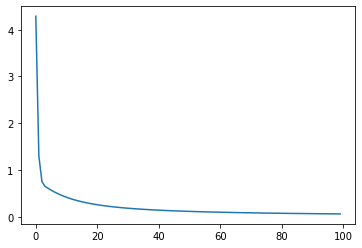

In [13]:
#Plotting error over the epochs

import matplotlib.pyplot as plt
plt.plot(cost_list1)
plt.show()

A lower learning rate decreases the accuracy. Looking at the plot for cost, it can be seen that lesser epochs can also achieve similar accuracy.
Iris dataset is easy to classify. 

In [14]:
#Checking by dividing dataset into training and testing

#Taking the shuffled dataset

W2, B2, cost_list2 = train(X_[:120], Y_[:120], 0.1, 100)

acc3 = calc_accuracy(X_[120:], Y_[120:], W2, B2)
print("Accuracy for test data is: ", acc3)

Accuracy for test data is:  100.0


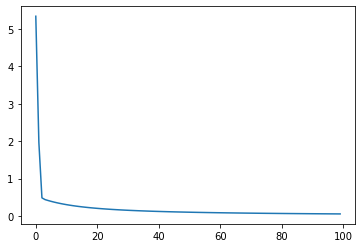

In [15]:
#Plotting error over the epochs

import matplotlib.pyplot as plt
plt.plot(cost_list2)
plt.show()

# You are familiar with the matrix notation and linear algebra. Using the mathematical procedure (discussed on unit, 9) of feature selection implement your own feature selection algorithm to select 5 best features of OnlineNewsPopularity data set.

In [16]:
df = pd.read_csv('OnlineNewsPopularity.csv')
df

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9,211,0.575130,1.0,0.663866,3,1,1,0,4.393365,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9,531,0.503788,1.0,0.665635,9,0,1,0,4.404896,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13,1072,0.415646,1.0,0.540890,19,19,20,0,4.682836,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11,346,0.529052,1.0,0.684783,9,7,1,1,4.523121,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,12,328,0.696296,1.0,0.885057,9,7,3,48,4.405488,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,10,442,0.516355,1.0,0.644128,24,1,12,1,5.076923,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,6,682,0.539493,1.0,0.692661,10,1,1,0,4.975073,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


### Defining the linear regression model to calculate SSE and be able to perform feature selection

In [17]:
def calc_error(y_h, y):
    error = (y_h - y)
    error = np.square(error)
    error = sum(error)
    return error

In [18]:
def Actual_reg(x_train, y_train):
    #Transposing x
    x_t = x_train.T
    s = np.matmul(x_t,x_train)
    #Finding inverse
    si = np.linalg.inv(s)
    b = np.matmul(si,x_t)
    #Getting final w_h
    w_h = np.matmul(b,y_train)
    return w_h

In [19]:
from sklearn.model_selection import train_test_split

def Linear_reg(Data, Resp, test_size):
    #Splitting data into testing and training data.
    x_train, x_test, y_train, y_test = train_test_split(Data, Resp, test_size = test_size, random_state=1, shuffle = False)
    #Calculating the best possible w_h 
    w_h = Actual_reg(x_train, y_train)
    #Getting the predicted values
    y_h_train = np.matmul(x_train, w_h)
    y_h_test = np.matmul(x_test, w_h)
    #Calculating the error
    train_error = calc_error(y_h_train, y_train)
    test_error = calc_error(y_h_test, y_test)
    return train_error, test_error

### Performing Linear Regression on the Data without feature selection

In [20]:
N = len(df.columns)

In [21]:
DataX = df.iloc[:,:N-1].values

DataY = df['shares'].values

In [22]:
train_error1, test_error1 = Linear_reg(DataX, DataY, 0.8)

print("Training error with all the features: ", train_error1)
print("Testing error with all the features: ", test_error1)

Training error with all the features:  330026266486217.94
Testing error with all the features:  3.1063201602565734e+18


### Select 5 best features

Approach: Find how each feature affects the error. By taking one feature at a time. Then combine features with lowest errors till best sse is reached.

In [23]:
SSE_list = {}
#Getting feature wise list of errors

for i in range(N-1):
    x = df.iloc[:, i].values
    x = x.reshape([x.shape[0], 1])
    tr, te = Linear_reg(x, DataY, 0.8)
    
    SSE_list[i] = tr

In [24]:
#Sorting the features on basis of SSE
Sorted_SSE = {k: v for k, v in sorted(SSE_list.items(), key=lambda item: item[1])}

#Taking first 5 items!
first_feature = list(Sorted_SSE.items())[0]
#Next 4 features
out = dict(list(Sorted_SSE.items())[1: 5])

### For only the best 5 features!

In [25]:
n, er = first_feature
x = df.iloc[:, n].values
x = x.reshape([x.shape[0], 1])

SSE = er

for k in out:
    x_new = df.iloc[:, k].values
    x_new = x_new.reshape([x_new.shape[0], 1])
    x = np.append(x, x_new, 1)
    
    tr, te = Linear_reg(x, DataY, 0.8)

print("Final Train SSE after taking best 5 features: ", tr)
print("Final Test SSE after taking best 5 features: ", te)

Final Train SSE after taking best 5 features:  1239757189288.8093
Final Test SSE after taking best 5 features:  4069635422271.789


### If had to find the optimal number of features for best results with Linear Regression

In [26]:
n, er = first_feature
x = df.iloc[:, n].values
x = x.reshape([x.shape[0], 1])

SSE = er

count = 1

for k in dict(list(Sorted_SSE.items())[1:]):
    x_new = df.iloc[:, k].values
    x_new = x_new.reshape([x_new.shape[0], 1])
    x = np.append(x, x_new, 1)
    
    tr, te = Linear_reg(x, DataY, 0.8)

    diff = SSE - tr
    SSE = tr
    
    count+= 1
    
    if abs(diff) < 20000:
        break
        
print("Best results with Linear Regression can be achieved with ", count, "features")
print("Lowest Training SSE achieveable is ", SSE)
print("Lowest Testing SSE achieveable is ", te)

Best results with Linear Regression can be achieved with  21 features
Lowest Training SSE achieveable is  1236256175995.8584
Lowest Testing SSE achieveable is  4075838840973.5586


Since the error is too large, a large Threshhold has been taken.!

### Using Sklearn method!

In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [28]:
model=LinearRegression(fit_intercept=True,normalize=True,n_jobs=-1)

# create the RFE model and selecting 5 attributes

rfe = RFE(model, 5) 

/Users/abhigyaurja/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [29]:
rfe.fit(DataX, DataY)

RFE(estimator=LinearRegression(n_jobs=-1, normalize=True),
    n_features_to_select=5)

In [30]:
new_x = df.iloc[:,:N-1]  ##Same as DataX but in dataframe form
New_X = new_x[new_x.columns[rfe.support_]].values ##Finding the columns which are best

In [31]:
#Splitting in the same way as our own dataset was split for checking.
x_train, x_test, y_train, y_test = train_test_split(New_X, DataY, test_size = 0.8,\
                                                    random_state=1, shuffle = False)

In [32]:
reg = LinearRegression().fit(x_train, y_train)

In [33]:
y_pred1 = reg.predict(x_test)
y_pred2 = reg.predict(x_train)

In [34]:
#calc_error finds the sum of squared errors.
e1 = calc_error(y_pred1, y_test)
e2 = calc_error(y_pred2, y_train)

In [35]:
print("Training SSE with RFE method: ", e2)
print("Testing SSE with RFE method: ", e1)

Training SSE with RFE method:  1242875223960.4448
Testing SSE with RFE method:  4092634855356.1914
